In [111]:
# This project aims at finding customer sentiments or feelings on the product

# import necessary libraries
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
# import file
file_name = 'C:/Users/UltraBook 3.1/Desktop/data_analysis/reviews_for_classification/reviews_for_classification.csv'
review = pd.read_csv(file_name, sep=',')
review.head()

,name,country,date_time,stars,review_head,review_body
0,xxx xxx,GB,"Updated Apr 4, 2022",5,The best in all that matters,The best in all that matters! It's a great pla...
1,Javier Setovich,US,"Mar 8, 2022",5,Celsius Network ROCKS!,If you are looking for the best #HomeForCrypto...
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,I despise it so much. Transferring to other wa...
3,Isai Garcia,US,"Feb 23, 2022",1,Worst customer service and worst…,Worst customer service and worst company to de...
4,Tyler McMurray,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,Celsius is the most transparent and responsive...


In [3]:
# review_body column has missing values whbich can be replaced by the values in review_head
review['review_body'] = review['review_body'].fillna(review['review_head'])

In [60]:
# apply lowercasing
copyfile = review
new_file = review
copyfile['review_body'] = copyfile['review_body'].str.lower()


In [92]:
# tokenize the dataset
# copy_file = review
# copy_file['tokenized_words'] = copy_file['review_body'].apply(lambda x: nltk.word_tokenize(x))

# for i in copy_file['review_body']:
#     tokenized_sentence = nltk.word_tokenize(i)
# copy_file['new_sentence'] = " ".join(tokenized_sentence)
    
copy_file = copy_file.drop(columns=['new_sentence'])

In [93]:
copy_file.head(50)

,name,country,date_time,stars,review_head,review_body,tokens,tokenized_words
0,xxx xxx,GB,"Updated Apr 4, 2022",5,The best in all that matters,the best in all that matters! it's a great pla...,None,"[the, best, in, all, that, matters, !, it, 's,..."
1,Javier Setovich,US,"Mar 8, 2022",5,Celsius Network ROCKS!,if you are looking for the best #homeforcrypto...,None,"[if, you, are, looking, for, the, best, #, hom..."
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,i despise it so much. transferring to other wa...,None,"[i, despise, it, so, much, ., transferring, to..."
3,Isai Garcia,US,"Feb 23, 2022",1,Worst customer service and worst…,worst customer service and worst company to de...,None,"[worst, customer, service, and, worst, company..."
4,Tyler McMurray,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,celsius is the most transparent and responsive...,None,"[celsius, is, the, most, transparent, and, res..."
5,Leo,MX,"Jun 11, 2022",5,Best place to store crypto,"best wallet to manage, store and get rewards w...",None,"[best, wallet, to, manage, ,, store, and, get,..."
6,Carlos,US,"Jun 7, 2022",1,Loan Collateral Held Hostage,i took out a loan but now i cant pay the princ...,None,"[i, took, out, a, loan, but, now, i, cant, pay..."
7,Sam Desai,US,"Mar 20, 2022",5,Celsius Network is one of the best…,celsius network is one of the best crypto apps...,None,"[celsius, network, is, one, of, the, best, cry..."
8,Mehmet Çağlıyangil,TR,"May 6, 2022",5,Underrated!,celsius is one of the most underrated crypto r...,None,"[celsius, is, one, of, the, most, underrated, ..."
9,Facundo Sago,AR,"Updated May 28, 2022",2,Poor customer service! Atencion al cliente muy...,they suspended my account without reason. they...,None,"[they, suspended, my, account, without, reason..."


In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\UltraBook
[nltk_data]     3.1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# Remove stop words
# initialize stops words to english language
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 

In [76]:
# def remove_stopwords(sentence):
#     words = word_tokenize(sentence)
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     return ' '.join(filtered_words)


# for wordlist in copyfile['tokenized_words']:
#     remove_list = []
#     for word in wordlist:
#         if word in stop_words:
#             remove_list.append(word)
#             wordlist.remove(word)


for wordlists in copy_file['tokenized_words']:
    remove_list1 = []
    for word in wordlists:
        if word in stop_words:
            remove_list1.append(word)
            wordlists.remove(word)
         

In [78]:
import string 


# for wordlist in copyfile['tokenized_words']:
#     remove_list_punc = []
#     for word in wordlist:
#         if word in string.punctuation:
#             remove_list_punc.append(word)
#             wordlist.remove(word)

for wordlists in copy_file['tokenized_words']:
    remove_list_punc1 = []
    for word in wordlists:
        if word in string.punctuation:
            remove_list_punc1.append(word)
            wordlists.remove(word)
# char for char in text if char not in string.punctuation
# print(remove_list)

In [79]:
copyfile['tokenized_words'].head(40)
print(remove_list_punc)
print(remove_list_punc1)
# print(string.punctuation)

['.', '$', '.']
[]


In [82]:
copy_file.head(40)
# copy_file = copy_file.drop(columns='tokens')

,name,country,date_time,stars,review_head,review_body,tokenized_words
0,xxx xxx,GB,"Updated Apr 4, 2022",5,The best in all that matters,the best in all that matters! it's a great pla...,"[best, matters, 's, great, platform, easy, sim..."
1,Javier Setovich,US,"Mar 8, 2022",5,Celsius Network ROCKS!,if you are looking for the best #homeforcrypto...,"[looking, best, homeforcrypto, earn, steady, y..."
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,i despise it so much. transferring to other wa...,"[despise, much, transferring, wallets, difficu..."
3,Isai Garcia,US,"Feb 23, 2022",1,Worst customer service and worst…,worst customer service and worst company to de...,"[worst, customer, service, worst, company, dea..."
4,Tyler McMurray,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,celsius is the most transparent and responsive...,"[celsius, transparent, responsive, company, 'v..."
5,Leo,MX,"Jun 11, 2022",5,Best place to store crypto,"best wallet to manage, store and get rewards w...","[best, wallet, manage, store, get, rewards, cr..."
6,Carlos,US,"Jun 7, 2022",1,Loan Collateral Held Hostage,i took out a loan but now i cant pay the princ...,"[took, loan, cant, pay, principle, back, thoug..."
7,Sam Desai,US,"Mar 20, 2022",5,Celsius Network is one of the best…,celsius network is one of the best crypto apps...,"[celsius, network, one, best, crypto, apps, we..."
8,Mehmet Çağlıyangil,TR,"May 6, 2022",5,Underrated!,celsius is one of the most underrated crypto r...,"[celsius, one, underrated, crypto, related, we..."
9,Facundo Sago,AR,"Updated May 28, 2022",2,Poor customer service! Atencion al cliente muy...,they suspended my account without reason. they...,"[suspended, account, without, reason, n't, giv..."


In [96]:
copy_file['sentence'] = copy_file['tokenized_words'].apply(lambda x: ' '.join(x))

In [97]:
copy_file

,name,country,date_time,stars,review_head,review_body,tokens,tokenized_words,sentence
0,xxx xxx,GB,"Updated Apr 4, 2022",5,The best in all that matters,the best in all that matters! it's a great pla...,None,"[the, best, in, all, that, matters, !, it, 's,...",the best in all that matters ! it 's a great p...
1,Javier Setovich,US,"Mar 8, 2022",5,Celsius Network ROCKS!,if you are looking for the best #homeforcrypto...,None,"[if, you, are, looking, for, the, best, #, hom...",if you are looking for the best # homeforcrypt...
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,i despise it so much. transferring to other wa...,None,"[i, despise, it, so, much, ., transferring, to...",i despise it so much . transferring to other w...
3,Isai Garcia,US,"Feb 23, 2022",1,Worst customer service and worst…,worst customer service and worst company to de...,None,"[worst, customer, service, and, worst, company...",worst customer service and worst company to de...
4,Tyler McMurray,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,celsius is the most transparent and responsive...,None,"[celsius, is, the, most, transparent, and, res...",celsius is the most transparent and responsive...
...,...,...,...,...,...,...,...,...,...
21961,Ujjval,US,"Dec 12, 2019",1,Worst service ever,worst service ever. i was emailed to contact t...,None,"[worst, service, ever, ., i, was, emailed, to,...",worst service ever . i was emailed to contact ...
21962,Corey,US,"Oct 15, 2019",5,Best banking service I ever had!,best banking service i ever had!,None,"[best, banking, service, i, ever, had, !]",best banking service i ever had !
21963,Pat,US,"Sep 25, 2019",5,Preferred bank for over 25+ year,pnc has been my banking partner for over 25+ y...,None,"[pnc, has, been, my, banking, partner, for, ov...",pnc has been my banking partner for over 25+ y...
21964,Robin,US,"Feb 13, 2019",5,My only most trusted bank in 11 years,"my only most trusted bank in 11 years, please ...",None,"[my, only, most, trusted, bank, in, 11, years,...","my only most trusted bank in 11 years , please..."


In [100]:
# initialize the model 

sia = SentimentIntensityAnalyzer()

res = {}

for i, row in copy_file.iterrows():
    text = row['sentence']
    myid = row['name']
    res[myid] = sia.polarity_scores(text)

In [107]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'name'})
vaders = vaders.merge(copy_file, how='left')

In [108]:
vaders.head(30)

,name,neg,neu,pos,compound,country,date_time,stars,review_head,review_body,tokens,tokenized_words,sentence
0,xxx xxx,0.000,0.695,0.305,0.9656,GB,"Updated Apr 4, 2022",5,The best in all that matters,the best in all that matters! it's a great pla...,None,"[the, best, in, all, that, matters, !, it, 's,...",the best in all that matters ! it 's a great p...
1,Javier Setovich,0.037,0.672,0.291,0.9765,US,"Mar 8, 2022",5,Celsius Network ROCKS!,if you are looking for the best #homeforcrypto...,None,"[if, you, are, looking, for, the, best, #, hom...",if you are looking for the best # homeforcrypt...
2,Andrei Franco,0.118,0.826,0.056,-0.4639,VN,"Mar 23, 2022",1,I despise it so much,i despise it so much. transferring to other wa...,None,"[i, despise, it, so, much, ., transferring, to...",i despise it so much . transferring to other w...
3,Isai Garcia,0.200,0.800,0.000,-0.9460,US,"Feb 23, 2022",1,Worst customer service and worst…,worst customer service and worst company to de...,None,"[worst, customer, service, and, worst, company...",worst customer service and worst company to de...
4,Tyler McMurray,0.021,0.907,0.072,0.4555,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,celsius is the most transparent and responsive...,None,"[celsius, is, the, most, transparent, and, res...",celsius is the most transparent and responsive...
5,Leo,0.000,0.728,0.272,0.9437,MX,"Jun 11, 2022",5,Best place to store crypto,"best wallet to manage, store and get rewards w...",None,"[best, wallet, to, manage, ,, store, and, get,...","best wallet to manage , store and get rewards ..."
6,Carlos,0.000,0.325,0.675,0.8555,US,"Jun 7, 2022",1,Loan Collateral Held Hostage,i took out a loan but now i cant pay the princ...,None,"[i, took, out, a, loan, but, now, i, cant, pay...",i took out a loan but now i cant pay the princ...
7,Carlos,0.000,0.325,0.675,0.8555,MY,"Aug 25, 2021",4,"If Capital Protection is in place, I will be d...","love what you are doing now, strive for the se...",None,"[love, what, you, are, doing, now, ,, strive, ...","love what you are doing now , strive for the s..."
8,Carlos,0.000,0.325,0.675,0.8555,PR,"Dec 21, 2020",1,Frustrating KYC Process,gave them more than 3 days to help me with my ...,None,"[gave, them, more, than, 3, days, to, help, me...",gave them more than 3 days to help me with my ...
9,Carlos,0.000,0.325,0.675,0.8555,US,5 days ago,4,Slow on confirming the transfer,slow on confirming the transfer,None,"[slow, on, confirming, the, transfer]",slow on confirming the transfer


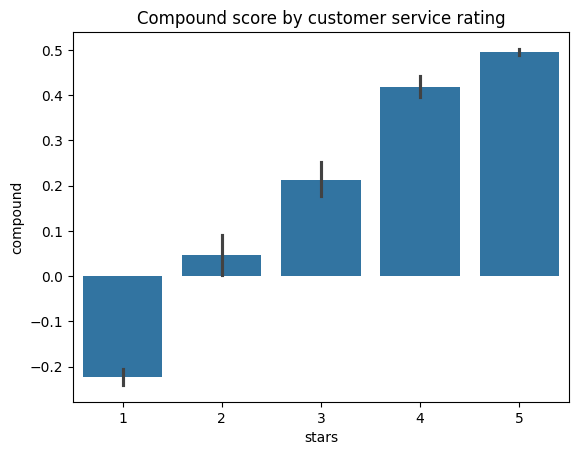

In [112]:
# plot the sentiment results
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compound score by customer service rating')
plt.show()

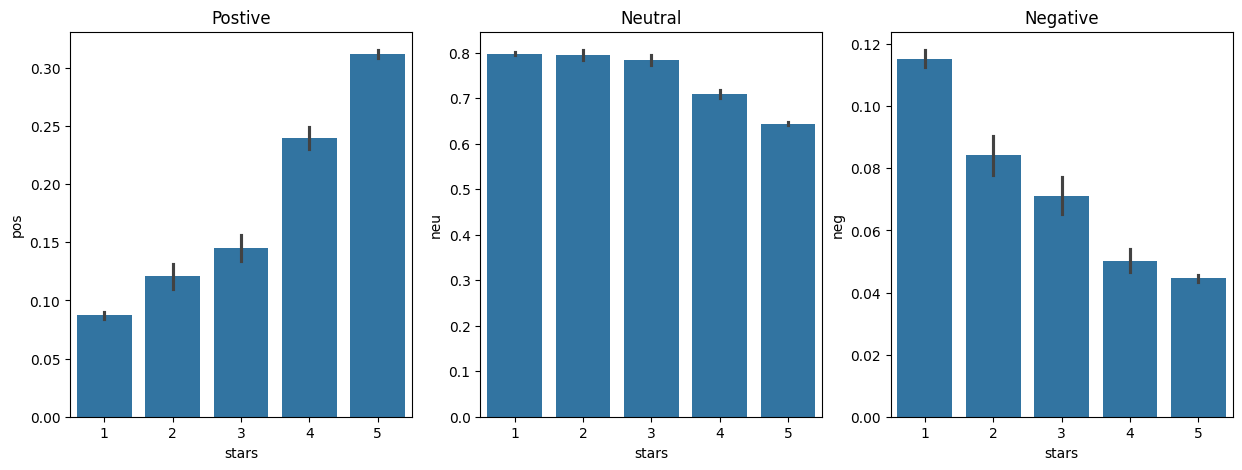

In [114]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [ ]:
# roberta petrained model can pick or address sacarsm and the relationship
# between words in the sentence.